# Comparing different warm-start methods for QAOA

## Packages and global variables

In [1]:
import sys
sys.path.insert(0, './../')
from time import time
from quantum_solvers import * 
from helper_functions import * 
from save_results import * 
from qiskit.visualization import plot_histogram
from tqdm import tqdm
from matplotlib import pyplot as plt
from seaborn import *
plt.style.use('seaborn-v0_8')
from qiskit.providers.aer import AerSimulator
backend = AerSimulator(method='statevector', device='GPU', precision='single')

## Single graph example

In [2]:
# n_qubits = 20
# n_layers = 2
# shots = 100

# graph = random_graph(n_qubits)
# print('True max-cut obj:', akmaxsat(graph)[1])

# standard_qaoa = QAOASolver(n_layers=n_layers, warm_start_method=None, epsilon=None, backend=backend, shots=shots)
# standard_res = standard_qaoa.solve(graph)
# print('\nStandard QAOA\n', standard_res)

# gw_rounded_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='GW Rounded', epsilon=.25, backend=backend, shots=shots)
# gw_rounded_res = gw_rounded_qaoa.solve(graph)
# print('\nGW-WS-QAOA\n', gw_rounded_res)

# bmz_relaxed = BMZ(graph)

# bmz_rounded_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ Rounded', epsilon=.25, backend=backend, shots=shots)
# bmz_rounded_res = bmz_rounded_qaoa.solve(graph, relaxed_solution=bmz_relaxed)
# print('\nBMZ-Rounded-WS-QAOA\n', bmz_rounded_res)

# bmz_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ', epsilon=.1, backend=backend, shots=shots)
# bmz_res = bmz_qaoa.solve(graph, relaxed_solution=bmz_relaxed)
# print('\nBMZ-WS-QAOA\n', bmz_res)

In [3]:
# fig, axes = plt.subplots(1, 4, figsize=(18, 4))
# width = .02

# bars = get_ratio_counts(standard_res.counts, graph)
# dense = []
# for key in bars.keys():
#     dense += [key]*bars[key]
# histplot(dense, ax=axes[0], stat='probability', binwidth=.02, element='step')
# axes[0].set_title(f'Standard QAOA')
# axes[0].set_xlabel('Approximation ratio')
# axes[0].set_xlim(0, 1 + width)
# axes[0].set_ylim(0, 1)
# axes[0].grid(False, axis='x')

# bars = get_ratio_counts(gw_rounded_res.counts, graph)
# dense = []
# for key in bars.keys():
#     dense += [key]*bars[key]
# histplot(dense, ax=axes[1], stat='probability', binwidth=.02, element='step')
# axes[1].set_title(f'GW-Rounded-WS-QAOA')
# axes[1].set_xlabel('Approximation ratio')
# axes[1].set_xlim(0, 1 + width)
# axes[1].set_ylim(0, 1)
# axes[1].grid(False, axis='x')

# bars = get_ratio_counts(bmz_rounded_res.counts, graph)
# dense = []
# for key in bars.keys():
#     dense += [key]*bars[key]
# histplot(dense, ax=axes[2], stat='probability', binwidth=.02, element='step')
# axes[2].set_title(f'BMZ-Rounded-WS-QAOA')
# axes[2].set_xlabel('Approximation ratio')
# axes[2].set_xlim(0, 1 + width)
# axes[2].set_ylim(0, 1)
# axes[2].grid(False, axis='x')

# bars = get_ratio_counts(bmz_res.counts, graph)
# dense = []
# for key in bars.keys():
#     dense += [key]*bars[key]
# histplot(dense, ax=axes[3], stat='probability', binwidth=.02, element='step')
# axes[3].set_title(f'BMZ-WS-QAOA')
# axes[3].set_xlabel('Approximation ratio')
# axes[3].set_xlim(0, 1 + width)
# axes[3].set_ylim(0, 1)
# axes[3].grid(False, axis='x')

# plt.suptitle(f'Warm-start method comparison ({n_layers} layers, {n_qubits} qubits)', fontsize=16, y=1.03)
# save_plot(fig, 'distribution_comparison')
# plt.show()

## Experiment 0

Test the performance of each relaxed classical solver on various numbers of qubits.

In [4]:
# size_vals = list(range(10, 41, 5))
# n_graphs = 10

# gw_mean_ratios = []
# bmz_mean_ratios = []
# gw_mean_times = []
# bmz_mean_times = []
# exact_mean_times = []
# n_vals = []
# progress = tqdm(total=len(size_vals)*n_graphs)
# for n in np.random.choice(size_vals, size=len(size_vals), replace=False):
#     n_vals.append(n)
#     gw_ratios = []
#     bmz_ratios = []
#     gw_times = []
#     bmz_times = []
#     exact_times = []
#     for i in range(n_graphs):
#         graph = random_graph(n)
#         start = time()
#         exact_val = akmaxsat(graph)[1]
#         exact_times.append(time() - start)
#         start = time()
#         gw_val = GW(graph)[1]
#         gw_times.append(time() - start)
#         start = time()
#         bmz_val = BMZ(graph)[1]
#         bmz_times.append(time() - start)
#         gw_ratios.append(gw_val/exact_val)
#         bmz_ratios.append(bmz_val/exact_val)
#         progress.update(1)
#     gw_mean_ratios.append(np.mean(gw_ratios))
#     bmz_mean_ratios.append(np.mean(bmz_ratios))
#     gw_mean_times.append(np.mean(gw_times))
#     bmz_mean_times.append(np.mean(bmz_times))
#     exact_mean_times.append(np.mean(exact_times))

# progress.close()
# n_vals = np.array(n_vals)
# gw_mean_ratios = np.array(gw_mean_ratios)
# bmz_mean_ratios = np.array(bmz_mean_ratios)
# gw_mean_times = np.array(gw_mean_times)
# bmz_mean_times = np.array(bmz_mean_times)
# exact_mean_times = np.array(exact_mean_times)
# index = np.argsort(n_vals)
# to_save = {'n_vals':n_vals, 'gw_mean_ratios':gw_mean_ratios, 'bmz_mean_ratios':bmz_mean_ratios, 'gw_mean_times':gw_mean_times, 'bmz_mean_times':bmz_mean_times, 'exact_mean_times':exact_mean_times}
# save_result(to_save, 'experiment_0')

In [5]:
# index = np.argsort(n_vals)
# fig = plt.figure()
# plt.plot(n_vals[index], gw_mean_ratios[index], label='GW')
# plt.plot(n_vals[index], bmz_mean_ratios[index], label='BMZ')
# plt.legend()
# plt.xlabel('Graph size', fontsize=12)
# plt.ylabel('Mean accuracy', fontsize=12)
# plt.title(f'Relaxed solver mean accuracy ({n_graphs} graphs)', fontsize=14)
# save_plot(fig, 'experiment_0')
# plt.show()

In [6]:
# fig = plt.figure()
# plt.plot(n_vals[index], gw_mean_times[index], label='GW')
# plt.plot(n_vals[index], bmz_mean_times[index], label='BMZ')
# plt.plot(n_vals[index], exact_mean_times[index], label='Exact')
# plt.legend()
# plt.xlabel('Graph size', fontsize=12)
# plt.ylabel('Mean computation time (s)', fontsize=12)
# plt.title(f'Relaxed solver mean computaton time ({n_graphs} graphs)', fontsize=14)
# save_plot(fig, 'experiment_0')
# plt.show()

In [7]:
# fig = plt.figure()
# plt.plot(n_vals[index], gw_mean_times[index], label='GW')
# plt.plot(n_vals[index], bmz_mean_times[index], label='BMZ')
# plt.legend()
# plt.xlabel('Graph size', fontsize=12)
# plt.ylabel('Mean computation time (s)', fontsize=12)
# plt.title(f'Relaxed solver mean computaton time ({n_graphs} graphs)', fontsize=14)
# save_plot(fig, 'experiment_0')
# plt.show()

## Experiment 1
For a fixed number of qubits, investigate the effect of the regularization parameter $\epsilon$.

In [8]:
# n_qubits = 20
# n_graphs = 1
# n_layers = 2
# shots = 100
# perturbation_ratio = .95

# epsilon_vals = np.arange(0, .501, .05)
# epsilon_strings = [str(round(val, 4)) for val in epsilon_vals]

# # n1, n2 = int(np.ceil(n_qubits/2)), int(np.floor(n_qubits/2))
# expectations = np.zeros((n_graphs, len(epsilon_vals)))
# vals = np.zeros((n_graphs, len(epsilon_vals)))
# progress = tqdm(total=n_graphs*len(epsilon_vals))
# for i in range(len(epsilon_vals)):
#     counter = 0
#     for j in range(n_graphs):
#         graph = random_graph(n_qubits)
#         exact_val = akmaxsat(graph)[1]
#         qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ', epsilon=epsilon_vals[i], backend=backend, shots=shots)

#         relaxed_solution = perturb_relaxed(perturbation_ratio, graph, BMZ(graph))

#         res = qaoa.solve(graph, relaxed_solution=relaxed_solution)
#         expectations[counter, i] = res.expectation/exact_val 
#         vals[counter, i] = res.obj/exact_val
#         counter += 1
#         progress.update(1)

# progress.close()
# save_result(expectations, 'experiment_1')

100%|██████████| 11/11 [00:59<00:00,  5.42s/it]


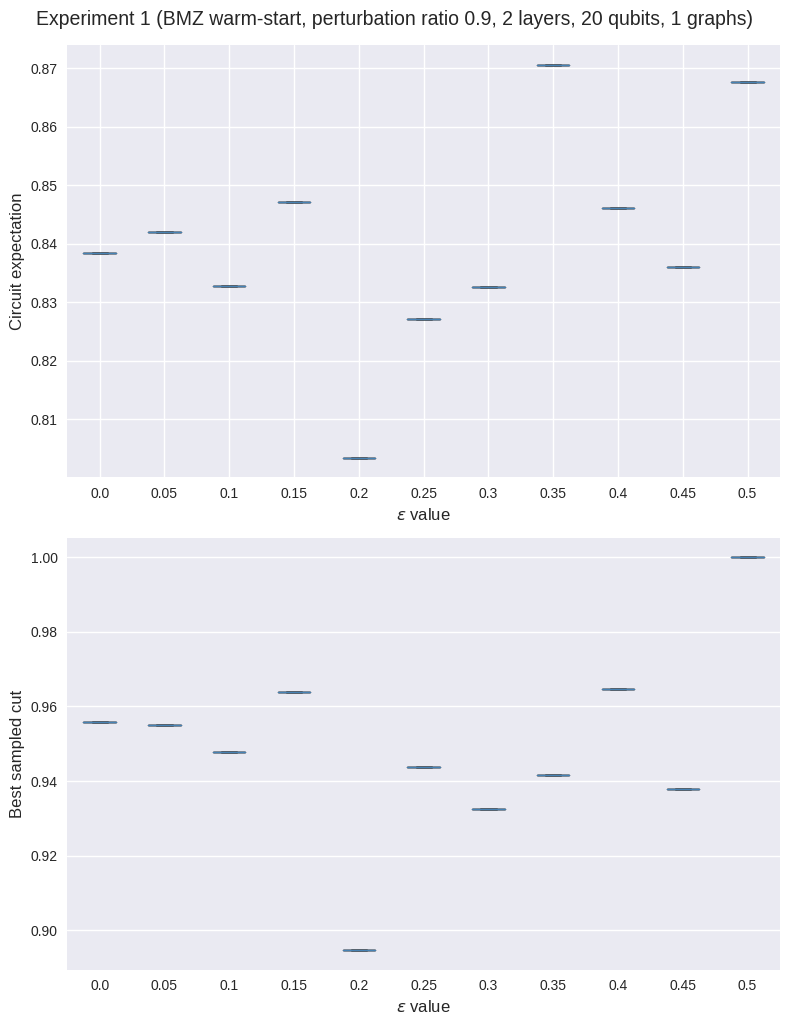

In [10]:
# fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# ax[0].boxplot(expectations, sym='.', positions=range(len(epsilon_vals)), 
# flierprops=dict(markeredgecolor='k'),
# medianprops=dict(color='steelblue'),
# boxprops=dict(color='k'),
# capprops=dict(color='k'),
# whiskerprops=dict(color='k'))
# ax[0].set_xticks(range(len(epsilon_vals)), epsilon_strings)
# ax[0].set_xlabel(r'$\epsilon$ value', fontsize=12)
# ax[0].set_ylabel('Circuit expectation', fontsize=12)
# plt.grid(False, axis='x')

# ax[1].boxplot(vals, sym='.', positions = range(len(epsilon_vals)), 
# flierprops=dict(markeredgecolor='k'),
# medianprops=dict(color='steelblue'),
# boxprops=dict(color='k'),
# capprops=dict(color='k'),
# whiskerprops=dict(color='k'))
# ax[1].set_xticks(range(len(epsilon_vals)), epsilon_strings)
# ax[1].set_xlabel(r'$\epsilon$ value', fontsize=12)
# ax[1].set_ylabel('Best sampled cut', fontsize=12)
# plt.grid(False, axis='x')
# plt.tight_layout()
# plt.suptitle(f'Experiment 1 (BMZ warm-start, perturbation ratio {perturbation_ratio}, {n_layers} layers, {n_qubits} qubits, {n_graphs} graphs)', fontsize=14, y=1.02)
# save_plot(fig, 'experiment_1')
# plt.show()

## Experiment 2

For a fixed number of qubits, run multiple trials over multiple graphs to compare expected circuit measurement values for each warm-start method (none, gw_rounded, bmz_rounded, and bmz).

In [ ]:
# n_qubits = 20
# n_layers = 2
# n_graphs = 100
# shots = 100

# standard_expectations = []
# standard_vals = []

# gw_rounded_expectations = []
# gw_rounded_vals = []

# bmz_rounded_expectations = []
# bmz_rounded_vals = []

# bmz_expectations = []
# bmz_vals = []

# progress = tqdm(total=n_graphs*4)
# exact_vals = []
# standard_results = []
# gw_rounded_results = []
# bmz_rounded_results = []
# bmz_results = []
# for i in range(n_graphs):
#     graph = random_graph(n_qubits)
#     exact_val = akmaxsat(graph)[1]
#     exact_vals.append(exact_val)

#     standard_qaoa = QAOASolver(n_layers=n_layers, warm_start_method=None, epsilon=None, backend=backend, shots=shots)
#     gw_rounded_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='GW Rounded', epsilon=.25, backend=backend, shots=shots)
#     bmz_rounded_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ Rounded', epsilon=.25, backend=backend, shots=shots)
#     bmz_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ', epsilon=.3, backend=backend, shots=shots)

#     standard_res = standard_qaoa.solve(graph)
#     standard_expectations.append(standard_res.expectation/exact_val)
#     standard_vals.append(standard_res.obj/exact_val)
#     standard_results.append(standard_res)
#     progress.update(1)

#     gw_rounded_res = gw_rounded_qaoa.solve(graph)
#     gw_rounded_expectations.append(gw_rounded_res.expectation/exact_val)
#     gw_rounded_vals.append(gw_rounded_res.obj/exact_val)
#     gw_rounded_results.append(gw_rounded_res)
#     progress.update(1)

#     bmz_relaxed = BMZ(graph)

#     bmz_rounded_res = bmz_rounded_qaoa.solve(graph, relaxed_solution=bmz_relaxed)
#     bmz_rounded_expectations.append(bmz_rounded_res.expectation/exact_val)
#     bmz_rounded_vals.append(bmz_rounded_res.obj/exact_val)
#     bmz_rounded_results.append(bmz_rounded_res)
#     progress.update(1)

#     bmz_res = bmz_qaoa.solve(graph, relaxed_solution=bmz_relaxed)
#     bmz_expectations.append(bmz_res.expectation/exact_val)
#     bmz_vals.append(bmz_res.obj/exact_val)
#     bmz_results.append(bmz_res)
#     progress.update(1)

# progress.close()
# to_save = {'exact':exact_vals, 'standard':standard_results, 'gw_rounded':gw_rounded_results, 'bmz_rounded':bmz_rounded_results, 'bmz':bmz_results}
# save_result(to_save, 'experiment_2')

In [ ]:
# fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# positions = [0, 2, 4, 6]

# ax[0].boxplot([standard_expectations, gw_rounded_expectations, bmz_rounded_expectations, bmz_expectations], positions=positions, sym='.', 
# flierprops=dict(markeredgecolor='k'),
# medianprops=dict(color='steelblue'),
# boxprops=dict(color='k'),
# capprops=dict(color='k'),
# whiskerprops=dict(color='k'))
# ax[0].set_xticks(positions, ['Standard QAOA', 'GW-Rounded-WS-QAOA', 'BMZ-Rounded-WS-QAOA', 'BMZ-WS-QAOA'])
# ax[0].set_ylabel('Circuit expectation', fontsize=12)
# plt.grid(False, axis='x')

# ax[1].boxplot([standard_vals, gw_rounded_vals, bmz_rounded_vals, bmz_vals], positions=positions, sym='.', 
# flierprops=dict(markeredgecolor='k'),
# medianprops=dict(color='steelblue'),
# boxprops=dict(color='k'),
# capprops=dict(color='k'),
# whiskerprops=dict(color='k'))
# ax[1].set_xticks(positions, ['Standard QAOA', 'GW-Rounded-WS-QAOA', 'BMZ-Rounded-WS-QAOA', 'BMZ-WS-QAOA'])
# ax[1].set_ylabel('Best sampled cut', fontsize=12)
# plt.grid(False, axis='x')

# plt.tight_layout()
# plt.suptitle(f'Experiment 2 ({n_layers} layers, {n_qubits} qubits, {n_graphs} graphs)', fontsize=14, y=1.02)
# save_plot(fig, 'experiment_2')
# plt.show()

## Experiment 3
For a fixed number of qubits, test performance over different values for the shots parameter.

In [ ]:
# shot_vals = [4, 20, 100]
# n_graphs = 1
# n_layers = 2
# n_qubits = 20
# n1, n2 = int(np.ceil(n_qubits/2)), int(np.floor(n_qubits/2))

# vals = np.zeros((n_graphs, len(shot_vals)*4))

# progress = tqdm(total=len(shot_vals)*n_graphs*4)
# for i in range(len(shot_vals)):
#     for j in range(n_graphs):
#         graph = random_graph(n_qubits)
#         exact_val = akmaxsat(graph)[1]

#         standard_qaoa = QAOASolver(n_layers, warm_start_method=None, epsilon=None, shots=shot_vals[i], backend=backend)
#         gw_rounded_qaoa = QAOASolver(n_layers, warm_start_method='GW Rounded', epsilon=.25, shots=shot_vals[i], backend=backend)
#         bmz_rounded_qaoa = QAOASolver(n_layers, warm_start_method='BMZ Rounded', epsilon=.25, shots=shot_vals[i], backend=backend)
#         bmz_qaoa = QAOASolver(n_layers, warm_start_method='BMZ', epsilon=.3, shots=shot_vals[i], backend=backend)
        
#         standard_res = standard_qaoa.solve(graph)
#         progress.update(1)
#         gw_rounded_res = gw_rounded_qaoa.solve(graph)
#         progress.update(1)

#         bmz_relaxed = BMZ(graph)

#         bmz_rounded_res = bmz_rounded_qaoa.solve(graph, relaxed_solution=bmz_relaxed)
#         progress.update(1)
#         bmz_res = bmz_qaoa.solve(graph, relaxed_solution=bmz_relaxed)
#         progress.update(1)

#         vals[j, i] = standard_res.obj/exact_val
#         vals[j, len(shot_vals) + i] = gw_rounded_res.obj/exact_val
#         vals[j, 2*len(shot_vals) + i] = bmz_rounded_res.obj/exact_val
#         vals[j, 3*len(shot_vals) + i] = bmz_res.obj/exact_val
    
# save_result(vals, 'experiment_3')
# progress.close()

In [ ]:
# fig = plt.figure(figsize=(15, 6))
# algorithms = ['Standard QAOA', 'GW-Rounded-WS-QAOA', 'BMZ-Rounded-WS-QAOA', 'BMZ-WS-QAOA']
# positions = [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]
# labels = []
# #inelegantbutworks
# counter = 0
# for i in range(len(positions)):
#     idx = i%len(shot_vals)
#     if idx == 1:
#         labels.append(str(shot_vals[idx]) + ' shots\n\n' + str(algorithms[counter]))
#         counter += 1
#     else:
#         labels.append(str(shot_vals[idx]) + ' shots')

# plt.boxplot(vals, positions=positions, sym='.', 
# flierprops=dict(markeredgecolor='k'),
# medianprops=dict(color='steelblue'),
# boxprops=dict(color='k'),
# capprops=dict(color='k'),
# whiskerprops=dict(color='k'))
# plt.xticks(positions, labels)
# plt.ylabel('Approximation Ratio', fontsize=12)
# plt.grid(False, axis='x')

# plt.title(f'Experiment 3 ({n_layers} layers, {n_qubits} qubits, {n_graphs} graphs)', fontsize=14)
# save_plot(fig, 'experiment_3')
# plt.show()

## Experiment 4
Perturbation experiment.

In [ ]:
# n_qubits = 20
# n_layers = 2
# n_graphs = 100
# shots = 100
# perturbation_ratio = .9

# standard_expectations = []
# standard_vals = []

# bmz_rounded_expectations = []
# bmz_rounded_vals = []
# bmz_rounded_relaxed = []
# bmz_rounded_improvement = []

# bmz_expectations = []
# bmz_vals = []
# bmz_relaxed = []
# bmz_improvement = []

# progress = tqdm(total=n_graphs*3)
# exact_vals = []
# standard_results = []
# bmz_rounded_results = []
# bmz_results = []
# for i in range(n_graphs):
#     exact_val = 0
#     while exact_val == 0:
#         graph = random_graph(n_qubits)
#         exact_val = akmaxsat(graph)[1]
#     exact_vals.append(exact_val)

#     standard_qaoa = QAOASolver(n_layers=n_layers, warm_start_method=None, epsilon=None, backend=backend, shots=shots)
#     standard_res = standard_qaoa.solve(graph)
#     standard_expectations.append(standard_res.expectation/exact_val)
#     standard_vals.append(standard_res.obj/exact_val)
#     standard_results.append(standard_res)
#     progress.update(1)

#     relaxed_solution = perturb_relaxed(perturbation_ratio, graph, BMZ(graph))
    
#     bmz_rounded_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ Rounded', epsilon=.25, backend=backend, shots=shots)
#     bmz_rounded_res = bmz_rounded_qaoa.solve(graph, relaxed_solution=relaxed_solution)
#     bmz_rounded_expectations.append(bmz_rounded_res.expectation/exact_val)
#     bmz_rounded_vals.append(bmz_rounded_res.obj/exact_val)
#     bmz_rounded_relaxed.append(bmz_rounded_res.relaxed_obj/exact_val)
#     bmz_rounded_improvement.append((bmz_rounded_res.obj - bmz_rounded_res.relaxed_obj)/exact_val)
#     bmz_rounded_results.append(bmz_rounded_res)
#     progress.update(1)

#     bmz_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ', epsilon=.3, backend=backend, shots=shots)
#     bmz_res = bmz_qaoa.solve(graph, relaxed_solution=relaxed_solution)
#     bmz_expectations.append(bmz_res.expectation/exact_val)
#     bmz_vals.append(bmz_res.obj/exact_val)
#     bmz_relaxed.append(bmz_res.relaxed_obj/exact_val)
#     bmz_improvement.append((bmz_res.obj - bmz_res.relaxed_obj)/exact_val)
#     bmz_results.append(bmz_res)
#     progress.update(1)

# progress.close()
# to_save = {'exact':exact_vals, 'standard':standard_results, 'bmz_rounded':bmz_rounded_results, 'bmz':bmz_results}
# save_result(to_save, 'experiment_4')

In [ ]:
# fig, ax = plt.subplots(2, 2, figsize=(16, 10))
# ax = ax.ravel()
# positions = [0, 2, 4]

# ax[0].boxplot([standard_expectations, bmz_rounded_expectations, bmz_expectations], positions=positions, sym='.', 
# flierprops=dict(markeredgecolor='k'),
# medianprops=dict(color='steelblue'),
# boxprops=dict(color='k'),
# capprops=dict(color='k'),
# whiskerprops=dict(color='k'))
# ax[0].set_xticks(positions, ['Standard QAOA', 'BMZ-Rounded-WS-QAOA', 'BMZ-WS-QAOA'])
# ax[0].set_ylabel('Circuit expectation', fontsize=12)
# plt.grid(False, axis='x')

# ax[1].boxplot([standard_vals, bmz_rounded_vals, bmz_vals], positions=positions, sym='.', 
# flierprops=dict(markeredgecolor='k'),
# medianprops=dict(color='steelblue'),
# boxprops=dict(color='k'),
# capprops=dict(color='k'),
# whiskerprops=dict(color='k'))
# ax[1].set_xticks(positions, ['Standard QAOA', 'BMZ-Rounded-WS-QAOA', 'BMZ-WS-QAOA'])
# ax[1].set_ylabel('Best sampled cut', fontsize=12)
# plt.grid(False, axis='x')

# ax[2].boxplot([bmz_rounded_relaxed, bmz_relaxed], positions=positions[:-1], sym='.', 
# flierprops=dict(markeredgecolor='k'),
# medianprops=dict(color='steelblue'),
# boxprops=dict(color='k'),
# capprops=dict(color='k'),
# whiskerprops=dict(color='k'))
# ax[2].set_xticks(positions[:-1], ['BMZ-Rounded-WS-QAOA', 'BMZ-WS-QAOA'])
# ax[2].set_ylabel('Relaxed accuracy (after perturbation)', fontsize=12)
# plt.grid(False, axis='x')

# ax[3].boxplot([bmz_rounded_improvement, bmz_improvement], positions=positions[:-1], sym='.', 
# flierprops=dict(markeredgecolor='k'),
# medianprops=dict(color='steelblue'),
# boxprops=dict(color='k'),
# capprops=dict(color='k'),
# whiskerprops=dict(color='k'))
# ax[3].set_xticks(positions[:-1], ['BMZ-Rounded-WS-QAOA', 'BMZ-WS-QAOA'])
# ax[3].set_ylabel('Improvement', fontsize=12)
# plt.grid(False, axis='x')

# plt.tight_layout()
# plt.suptitle(f'Experiment 4 ({n_layers} layers, {n_qubits} qubits, {shots} shots, {n_graphs} graphs)', fontsize=14, y=1.02)
# save_plot(fig, 'experiment_4')
# plt.show()